# Inference Time Augmentation

In [1]:
import importlib
import sys

sys.path.append("..")  # Ensure the parent directory is in the path

from dataclasses import dataclass
from data_preprocessing.dataset_dataloader import create_data_loader
from transformers import AutoTokenizer
from tqdm import tqdm

# --- Local Application/Module Imports ---
import data_loader.data_loader
import data_preprocessing.data_preprocessing
import data_preprocessing.llm_augmentation
import models.models
import visualizations.visualizations
import utils.utils

importlib.reload(data_loader.data_loader)
from data_loader.data_loader import *

importlib.reload(data_preprocessing.data_preprocessing)

importlib.reload(data_preprocessing.llm_augmentation)
from data_preprocessing.llm_augmentation import *

importlib.reload(models.models)
from models.models import *

importlib.reload(visualizations.visualizations)
from visualizations.visualizations import *

importlib.reload(utils.utils)
from utils.utils import *

# --- Notebook Configuration ---
%matplotlib inline
%config InlineBackend.figure_format='retina'

# --- Global Settings ---
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
os.environ["TOKENIZERS_PARALLELISM"] = "false"

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tnorlha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tnorlha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/tnorlha/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tnorlha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tnorlha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tnorlha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/tnorlha/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tnorlha/nltk_data...
[nltk_data]   Package wordnet is alre

## Loading data and splitting into train, validation, and test sets

In [2]:
train_df, val_df, test_df = load_and_split_data()

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))

Train size: 81677
Validation size: 10210
Test size: 10210


In [3]:
device = get_device()
print(f"Using device: {device}")

Using device: mps


------

In [4]:
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"

llama_pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

outputs = llama_pipeline(
    messages,
    max_new_tokens=256,
)
print(outputs[0]["generated_text"][-1])

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the disk.
Device set to use mps
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


{'role': 'assistant', 'content': "Arrrr, ye landlubber! I be Captain Chatbeard, the scurviest pirate chatbot to ever sail the Seven Seas o' Knowledge! Me and me trusty keyboard be ready to set sail fer a swashbucklin' adventure o' learnin' and discoverin' with ye! What be bringin' ye to these fair waters?"}


In [5]:
output = generate_variations(llama_pipeline, paraphrasing_prompt,
                             "recommend some upscale restaurants in newyork?")

In [6]:
variations = extract_generated_variations(output)
print(variations)

['Would you like me to suggest some high-end eateries in New York?', 'Can you please recommend some luxury restaurants in NYC?']


In [7]:
sanitizing_prompt="""
You are a text preprocessing assistant for a sentiment classification competition. Your job is to sanitize user-generated content while preserving its original meaning and sentiment.

Given an input text, follow these steps carefully:

1. If the text is in a language other than English, translate it into natural English.
2. Correct any spelling or grammatical errors.
3. Expand contractions (e.g., "don't" → "do not").
4. Replace any obfuscated or censored swearwords with their full uncensored versions.
5. Do not censor or euphemize offensive words—your goal is to retain the true intent of the sentence.
6. Do not classify or comment on the sentiment; only sanitize the text as described above.

Return only the cleaned and normalized sentence as output.

### Example 1
Input:
J'adore ce produit, c'est parfait!
Output:
I love this product, it is perfect!

### Example 2
Input:
Ths restuarant iz horible!! nevr going bak
Output:
This restaurant is horrible! Never going back.

### Example 3
Input:
don’t trust ths s***ty company, they’re liars
Output:
Do not trust this shitty company, they are liars.

---

Now process the following input:

Input: "<<INPUT>>"
"""

In [8]:
# Spelling Mistakes
output = generate_variations(llama_pipeline, sanitizing_prompt,
                             "This plase iz abslutely horible, nevr recomnd it!!")

In [10]:
print(output)

To process the input, we'll follow the steps:

1. Translate the text into natural English (if necessary). In this case, the text is already in English.
2. Correct any spelling or grammatical errors.
3. Expand contractions.
4. Replace any obfuscated or censored swearwords with their full uncensored versions.

Here's the Python code to accomplish this using the `langdetect` library for language detection, `googletrans` library for translation, `pyspellchecker` library for spell checking, and `nltk` library for expanding contractions and handling swearwords:

```python
import langdetect
from googletrans import Translator
from spellchecker import SpellChecker
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK resources if not already downloaded
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

def sanitize_text(

In [9]:
# Language (French-English)
output = generate_variations(llama_pipeline, sanitizing_prompt,
                             "C'était trop nul, the service sucked big time.")


KeyboardInterrupt



In [ ]:
# Language (German-English)
output = generate_variations(llama_pipeline, sanitizing_prompt,
                             "Das war der schlechteste Kundendienst, den ich je erlebt habe.")

In [ ]:
# Contractions
output = generate_variations(llama_pipeline, sanitizing_prompt,
                             "I ain’t got no clue wtf just happnd.")

In [ ]:
# Masked Profanity & Grammar Issues
output = generate_variations(llama_pipeline, sanitizing_prompt,
                             "U r such a d*ckh#ad, gtfo my face!!")

In [ ]:
# Censored + Slang
output = generate_variations(llama_pipeline, sanitizing_prompt,
                             "Lmfaooo what a f#ckn joke, bruh u serious??")

## T5 for paraphrase generation

In [2]:


from parrot import Parrot
import torch
import warnings
warnings.filterwarnings("ignore")

'''
uncomment to get reproducable paraphrase generations
def random_state(seed):
  torch.manual_seed(seed)
  if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

random_state(1234)
'''

#Init models (make sure you init ONLY once if you integrate this to your code)
parrot = Parrot(model_tag="prithivida/parrot_paraphraser_on_T5", use_gpu=True)

phrases = ["Can you recommed some upscale restaurants in Newyork?",
           "What are the famous places we should not miss in Russia?"
]

for phrase in phrases:
  print("-"*100)
  print("Input_phrase: ", phrase)
  print("-"*100)
  para_phrases = parrot.augment(input_phrase=phrase)
  for para_phrase in para_phrases:
   print(para_phrase)


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


----------------------------------------------------------------------------------------------------
Input_phrase:  Can you recommed some upscale restaurants in Newyork?
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


('recommend some upscale restaurants in newyork?', 21)
('can you recommend some upscale restaurants in new york?', 14)
('can you recommend some upscale restaurants in newyork?', 13)
----------------------------------------------------------------------------------------------------
Input_phrase:  What are the famous places we should not miss in Russia?
----------------------------------------------------------------------------------------------------
('list some of the must-see places in russia?', 41)
('recommend some of the places worth visiting in russia?', 38)
('list some of the best places to visit in russia?', 38)


In [7]:
for phrase in train_df.text:
  print("-"*100)
  print("Input_phrase: ", phrase)
  print("-"*100)
  para_phrases = parrot.augment(input_phrase=phrase)
  for para_phrase in para_phrases:
   print(para_phrase)

The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


----------------------------------------------------------------------------------------------------
Input_phrase:  I'm just glad I wasn't paying the bill.
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


("i'm happy i didn't pay", 37)
("i'm just happy i didn't pay", 33)
("i'm just glad i didn't pay", 28)
("i'm happy i didn't pay the bill", 28)
("i'm just glad i didn't pay it", 26)
("i'm just happy i didn't pay the bill", 24)
("i'm glad i didn't pay the bill", 24)
("i'm just glad i didn't pay my bills", 22)
("i'm just glad i didn't pay the bill", 19)
----------------------------------------------------------------------------------------------------
Input_phrase:  We decided to give it a try.
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


('we decided to try it', 23)
('we decided to try it out', 21)
('we decided to give it a shot', 16)
('we decided to give it a try', 13)
----------------------------------------------------------------------------------------------------
Input_phrase:  Food was tasty.
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


('the food was good', 15)
----------------------------------------------------------------------------------------------------
Input_phrase:  When ` science fiction ' takes advantage of the fact that its intended audience has n't yet had much science , it does a disservice to the audience and to the genre .
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


('when science fiction takes advantage of the fact that its intended audience has not yet had much science it does a disservice to the audience and the genre ', 21)
----------------------------------------------------------------------------------------------------
Input_phrase:  I went here to have my iPhone 6 screen replaced.
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


('i went here to fix my iphone 6 screen', 26)
('i went here to have my iphone screen replaced', 15)
----------------------------------------------------------------------------------------------------
Input_phrase:  It 's full of cheesy dialogue , but great trashy fun that finally returns De Palma to his pulpy thrillers of the early '80s .
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


("it 's filled with cheesy dialogue but great trashy fun that finally brings de palma back to his pulpy thrillers of the early '80s ", 32)
('it is filled with cheesy dialogue but great trashy fun that finally returns de palma to his pulpy thrillers of the early 80s', 24)
("it's full of cheesy dialogue but great trashy fun that finally returns de palma to his pulpy thrillers of the early 1980s ", 17)
("it's full of cheesy dialogue but great trashy fun that finally returns de palma to his pulpy thrillers of the early '80s ", 15)
("it is full of cheesy dialogue but great trashy fun that finally returns de palma to his pulpy thrillers of the early '80s ", 15)
----------------------------------------------------------------------------------------------------
Input_phrase:  This is one of those "seems too good to be true" places, but it isn't.
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


("it's one of those places that look like they should be true but they are not", 56)
("this is one of those places that seems to be too good to be true but it's not", 42)
("this is one of those places that appears too good to be true but it's not", 40)
("this is one of those places that sounds too good to be true but it's not", 40)
("this is one of those places that looks too good to be true but it's not", 39)
----------------------------------------------------------------------------------------------------
Input_phrase:  I wish I remembered what I ordered though.
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


('i wish i knew what i ordered', 29)
('i would like to remember what i ordered', 28)
("i'd like to remember what i ordered", 28)
('i wish i had remembered what i ordered', 23)
('i wish i remembered what i ordered', 20)
('i wish i remembered what i ordered though', 13)
----------------------------------------------------------------------------------------------------
Input_phrase:  (Standing on a toilet seat stretching across the tub is not my idea of consumer safety.)
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


('standing on the toilet seat stretched out across the bath is not my idea of consumer safety', 26)
('standing on a toilet seat which extends across the tub is not my idea of consumer safety', 25)
('standing on the toilet seat stretched across the tub is not my notion of consumer safety', 25)
('standing on a toilet seat extending across the bathtub is not my idea of consumer safety', 23)
('standing on a toilet seat that extends across the tub is not my idea of consumer safety', 23)
----------------------------------------------------------------------------------------------------
Input_phrase:  A lot of places seem to be falling off the cart when it comes to knowing what is "in style" now.
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


("a lot of places seem to be getting off the cart when it comes to knowing what's in style right now", 25)
("many places seem to be falling off the cart when it comes to knowing what's in style now", 22)
('a lot of places seem to fall from the cart when it comes to knowing what is in style now', 22)
('a lot of places seem to fall off the cart when it comes to knowing what is in style now', 19)
("a lot of places seem to be falling out the cart when it comes to knowing what's in style now", 17)
("a lot of places seem to be falling off the cart when it comes to knowing what's in style now", 15)
----------------------------------------------------------------------------------------------------
Input_phrase:  Flowers are going to die I understand that but I expect to get more than 1 day out of them!
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


("flowers will die i understand that but i'm ready to get more than one day out of them", 33)
----------------------------------------------------------------------------------------------------
Input_phrase:  Update: I called because the toilet was filling slow.
----------------------------------------------------------------------------------------------------


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


('i called because the toilet had been slowly filling up', 38)
("i called because the bathroom wasn't filling well", 35)
('i called because the toilet was slowly filled', 31)
('i called because the toilet was filling up slow', 24)
('i called because the toilet was filling slowly', 22)
('update i called because the toilet was filled slowly', 18)
----------------------------------------------------------------------------------------------------
Input_phrase:  Worst experience ever.
----------------------------------------------------------------------------------------------------


TypeError: 'NoneType' object is not iterable

# Load Roberta large 4 epoch, batch size 16

## Baseline finetuned-model

In [44]:
@dataclass
class Config:
    batch_size: int
    model: str
    seed: int
    lr: float
    dropout: float
    attention_dropout: float
    device: str
    num_classes: int
    max_len: int

config = Config(
    batch_size = 16,
    model="FacebookAI/roberta-large",
    seed=RANDOM_SEED,
    lr=3e-5,
    dropout=0.1,
    attention_dropout=0.1,
    device=device,
    num_classes=3,
    max_len=64,
)

roberta_tokenizer = AutoTokenizer.from_pretrained(config.model)
roberta_model = load_blank_model(config)

# Load saved model state dict
checkpoint_path = "1_roberta_large_4_epoch_batch_16.bin"
state_dict = torch.load(checkpoint_path, map_location=device)
roberta_model.load_state_dict(state_dict)

roberta_model.to(device)
roberta_model.eval()


loss_fn = nn.CrossEntropyLoss().to(device)
test_data_loader = create_data_loader(test_df, roberta_tokenizer, config.max_len, config.batch_size)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
test_acc, _ = eval_model(
    roberta_model,
    test_data_loader,
    loss_fn,
    device
)

test_acc.item()

0.7953173814832107

In [46]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    roberta_model,
    test_data_loader,
    device
)

In [47]:
class_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=class_names))

              precision    recall  f1-score   support

    negative       0.77      0.74      0.76      2191
     neutral       0.83      0.83      0.83      4915
    positive       0.79      0.81      0.80      3104

    accuracy                           0.81     10210
   macro avg       0.80      0.79      0.80     10210
weighted avg       0.81      0.81      0.81     10210



In [48]:
print(L_score(y_test, y_pred))

0.88692458374143


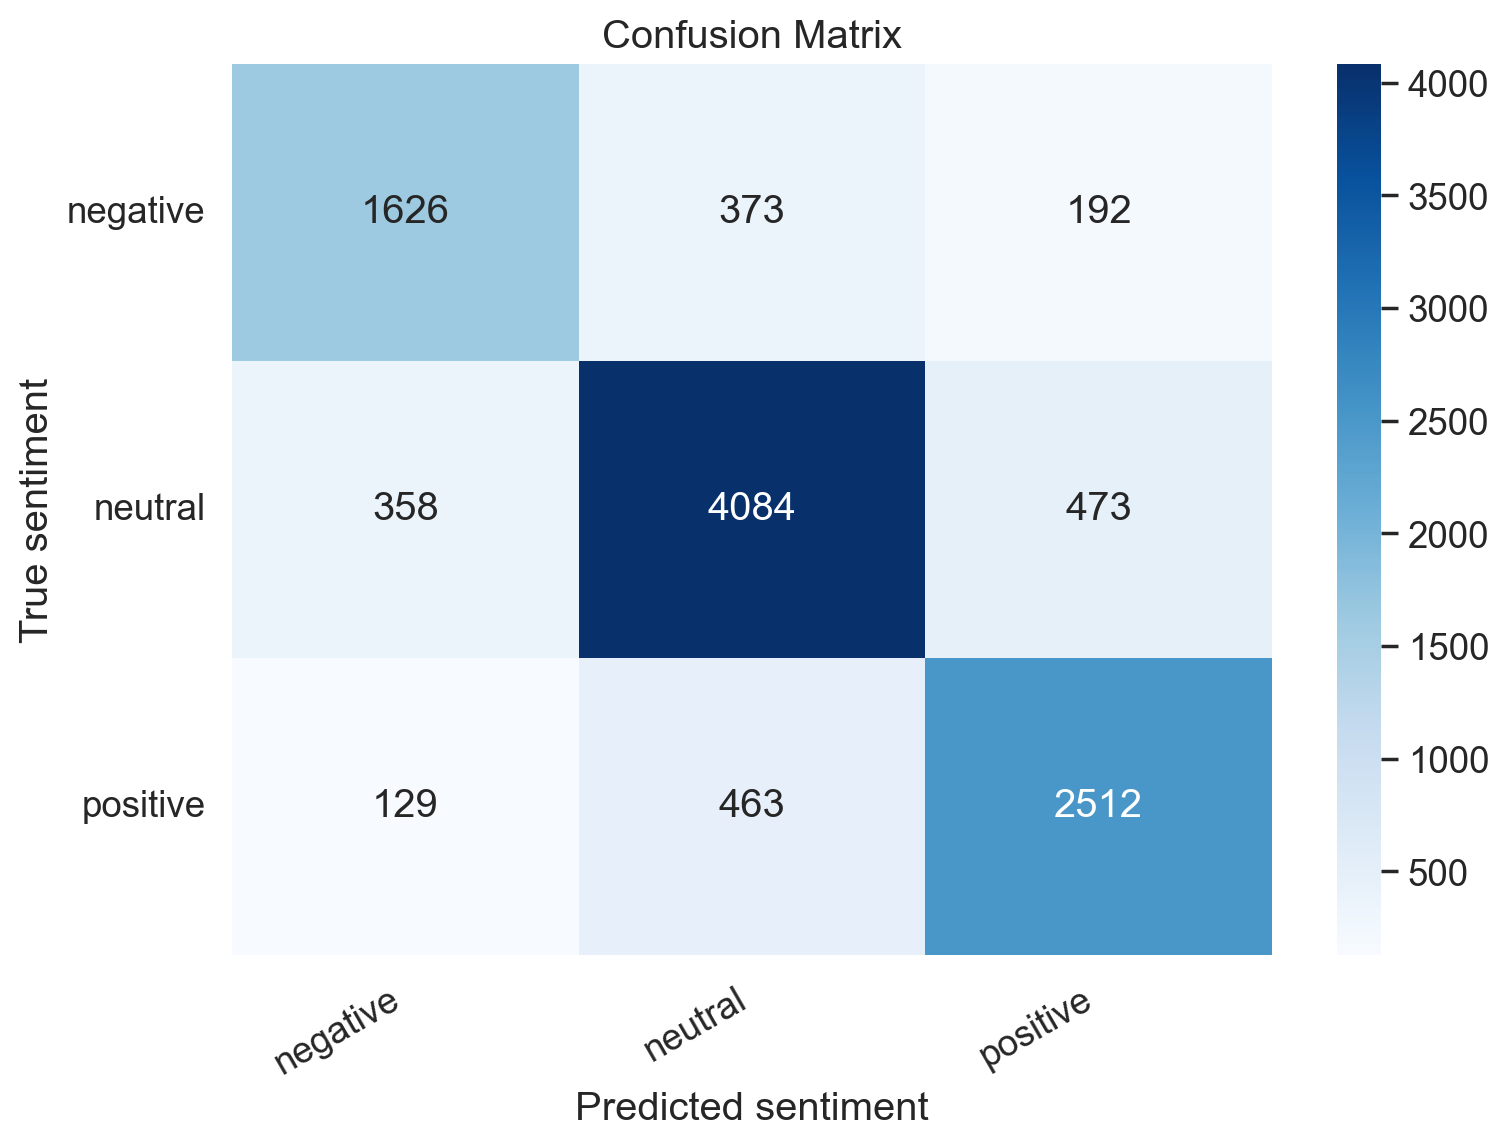

In [11]:
plot_confusion_matrix(y_test, y_pred, class_names)

# Gathering missclassification error samples

In [13]:
# False negatives for positive = positives predicted as negative
pos_neg = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true == LABEL_MAPPING_STRING_TO_NUMBER["positive"] and pred == LABEL_MAPPING_STRING_TO_NUMBER["negative"]]

# False positives for positive = negatives predicted as positive
neg_pos = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true == LABEL_MAPPING_STRING_TO_NUMBER["negative"] and pred == LABEL_MAPPING_STRING_TO_NUMBER["positive"]]

print("False negatives for positive (missed positives):", len(pos_neg))
print("False positives for positive (wrongly predicted positives):", len(neg_pos))
print()

for i in pos_neg[:10]:
    print(f"Text: {test_df.iloc[i]['text']}")
    print(f"True label: {class_names[y_test[i]]}, Predicted: {class_names[y_pred[i]]}")
    print("-"*80)

False negatives for positive (missed positives): 129
False positives for positive (wrongly predicted positives): 192

Text: Alas, I should've had more faith in my beloved Trader's.
True label: positive, Predicted: negative
--------------------------------------------------------------------------------
Text: I got nauseous and before I could even let someone know, 3-4 staff members ran over and were placing cold packs under my clothes and talking me through it.
True label: positive, Predicted: negative
--------------------------------------------------------------------------------
Text: Amazingly dopey .
True label: positive, Predicted: negative
--------------------------------------------------------------------------------
Text: Show is 90 minutes long and doesn't feel like it at all.
True label: positive, Predicted: negative
--------------------------------------------------------------------------------
Text: Try: The Vito with hot peppers

Avoid: The mayo on the Italian Nightclub

In [14]:
other_mistakes = {
    "neu_neg": [],
    "neu_pos": [],
    "pos_neu": [],
    "neg_neu": []
}

for i, (true, pred) in enumerate(zip(y_test, y_pred)):
    if true == LABEL_MAPPING_STRING_TO_NUMBER["neutral"] and pred == LABEL_MAPPING_STRING_TO_NUMBER["negative"]:
        other_mistakes["neu_neg"].append(i)
    elif true == LABEL_MAPPING_STRING_TO_NUMBER["neutral"] and pred == LABEL_MAPPING_STRING_TO_NUMBER["positive"]:
        other_mistakes["neu_pos"].append(i)
    elif true == LABEL_MAPPING_STRING_TO_NUMBER["positive"] and pred == LABEL_MAPPING_STRING_TO_NUMBER["neutral"]:
        other_mistakes["pos_neu"].append(i)
    elif true == LABEL_MAPPING_STRING_TO_NUMBER["negative"] and pred == LABEL_MAPPING_STRING_TO_NUMBER["neutral"]:
        other_mistakes["neg_neu"].append(i)

for mistake_type, indices in other_mistakes.items():
    print(f"\n{mistake_type} ({len(indices)} examples):\n")
    for i in indices[:5]:  # show up to 5 examples
        print(f"Text: {test_df.iloc[i]['text']}")
        print(f"True label: {class_names[y_test[i]]}, Predicted: {class_names[y_pred[i]]}")
        print("-" * 80)


neu_neg (358 examples):

Text: Turned out the switch they Needed wasn't in stock.
True label: neutral, Predicted: negative
--------------------------------------------------------------------------------
Text: Stiff drinks.
True label: neutral, Predicted: negative
--------------------------------------------------------------------------------
Text: It 's too bad that the rest is n't more compelling .
True label: neutral, Predicted: negative
--------------------------------------------------------------------------------
Text: We ended up choosing to have them installed diagonally which would cost more due to the fact that more tiles needed to be cut and there would be more materials wasted.
True label: neutral, Predicted: negative
--------------------------------------------------------------------------------
Text: Names, biotch!
True label: neutral, Predicted: negative
--------------------------------------------------------------------------------

neu_pos (473 examples):

Text: I

In [16]:
# Problematic mistakes
pos_neg_df = test_df.iloc[pos_neg].copy()
neg_pos_df = test_df.iloc[neg_pos].copy()

# Less problematic mistakes
neu_neg_df = test_df.iloc[other_mistakes["neu_neg"]].copy()
neu_pos_df = test_df.iloc[other_mistakes["neu_pos"]].copy()
pos_neu_df = test_df.iloc[other_mistakes["pos_neu"]].copy()
neg_neu_df = test_df.iloc[other_mistakes["neg_neu"]].copy()

In [42]:
print("Lenghts: ")
print(f"{len(pos_neg_df)} {len(neg_pos_df)}")
print(f"{len(neu_neg_df)} {len(neu_pos_df)} {len(pos_neu_df)} {len(neg_neu_df)}")

Lenghts: 
129 192
358 473 463 373


## Augmentation at test time - paraphrasing

### True sentiment: positive - Predicted sentiment: negative

In [17]:
# pos_neg_df_variations_dict = llm_augment(llama_pipeline, pos_neg_df, paraphrasing_prompt)
# save_variations_to_csv(pos_neg_df_variations_dict, pos_neg_df, "pos_neg_df_paraphrasing_variations_prompt", base_path="")

test_pos_neg_df_paraphrasing_variations_prompt_variation_1 = pd.read_csv("../generated/data_augmentation/test_pos_neg_df_paraphrasing_variations_prompt_variation_1.csv", index_col=0)

test_pos_neg_df_paraphrasing_variations_prompt_variation_2 = pd.read_csv("../generated/data_augmentation/test_pos_neg_df_paraphrasing_variations_prompt_variation_2.csv", index_col=0)


test_data_loader_0 = create_data_loader(test_df.iloc[pos_neg], roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_1 = create_data_loader(test_pos_neg_df_paraphrasing_variations_prompt_variation_1, roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_2 = create_data_loader(test_pos_neg_df_paraphrasing_variations_prompt_variation_2, roberta_tokenizer, config.max_len, config.batch_size)

y_review_texts_0, y_pred_0, y_pred_probs_0, y_test_0 = get_predictions(
    roberta_model,
    test_data_loader_0,
    device
)

y_review_texts_1, y_pred_1, y_pred_probs_1, y_test_1 = get_predictions(
    roberta_model,
    test_data_loader_1,
    device
)

y_review_texts_2, y_pred_2, y_pred_probs_2, y_test_2 = get_predictions(
    roberta_model,
    test_data_loader_2,
    device
)

In [21]:
final_preds_majority = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    strategy="majority"
)

final_preds_softmax_avg = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    probs_list=[y_pred_probs_0, y_pred_probs_1, y_pred_probs_2],
    strategy="softmax_avg"
)

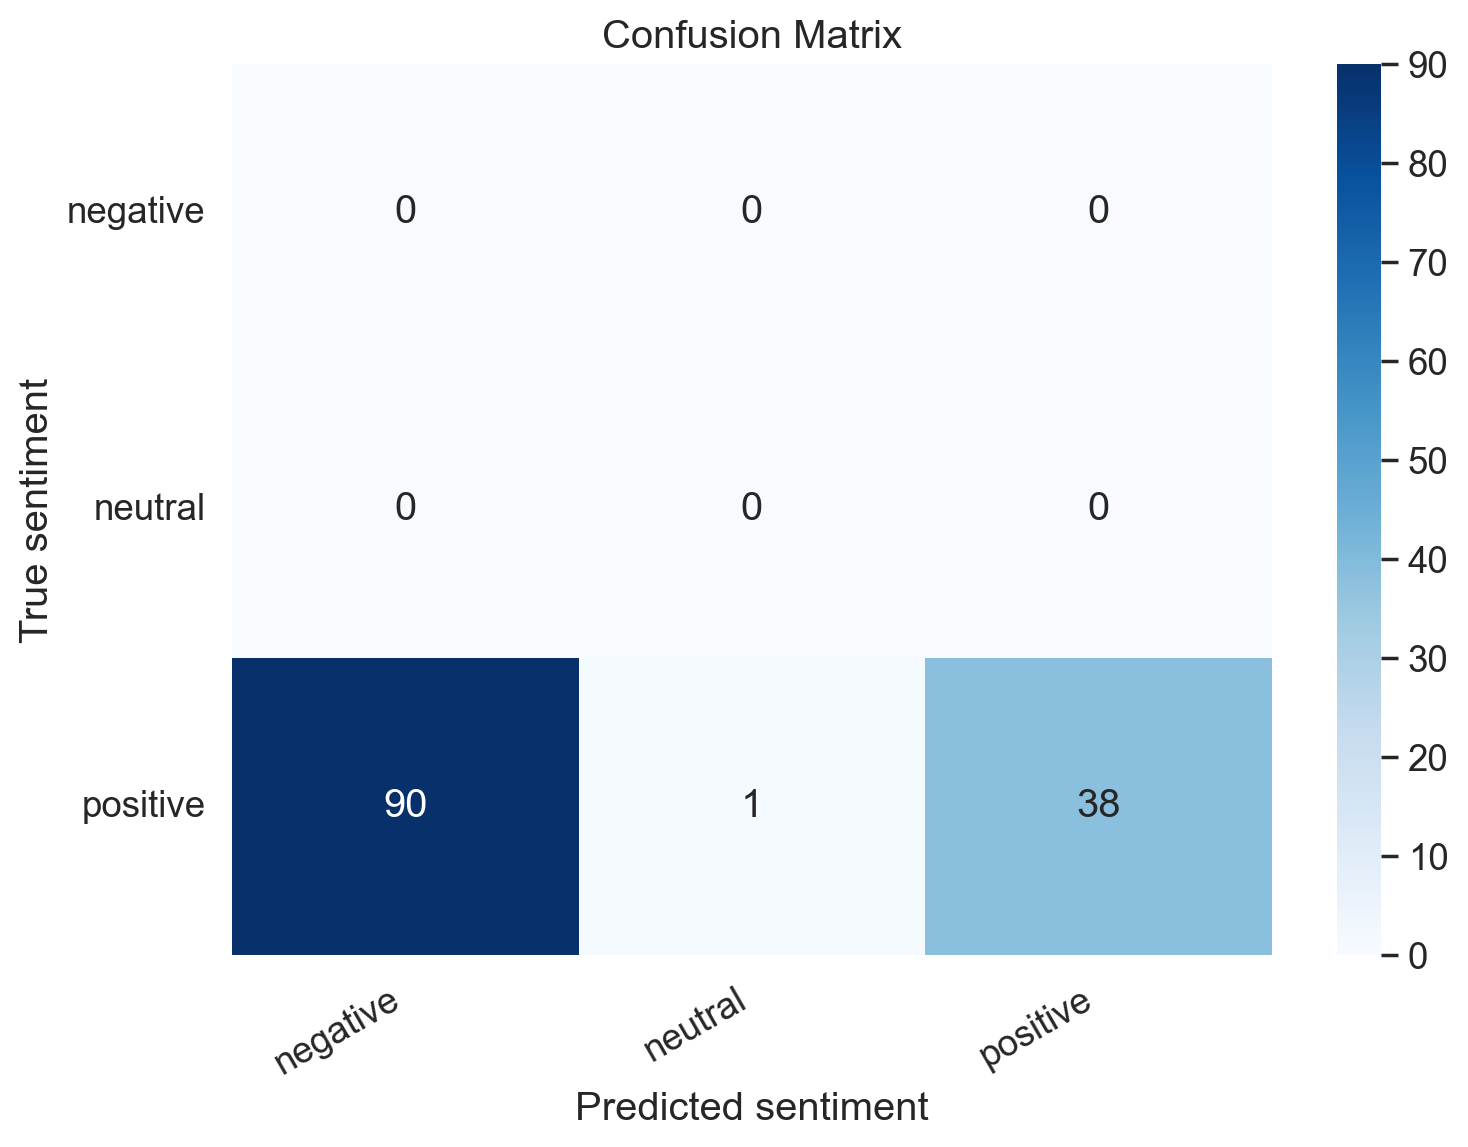

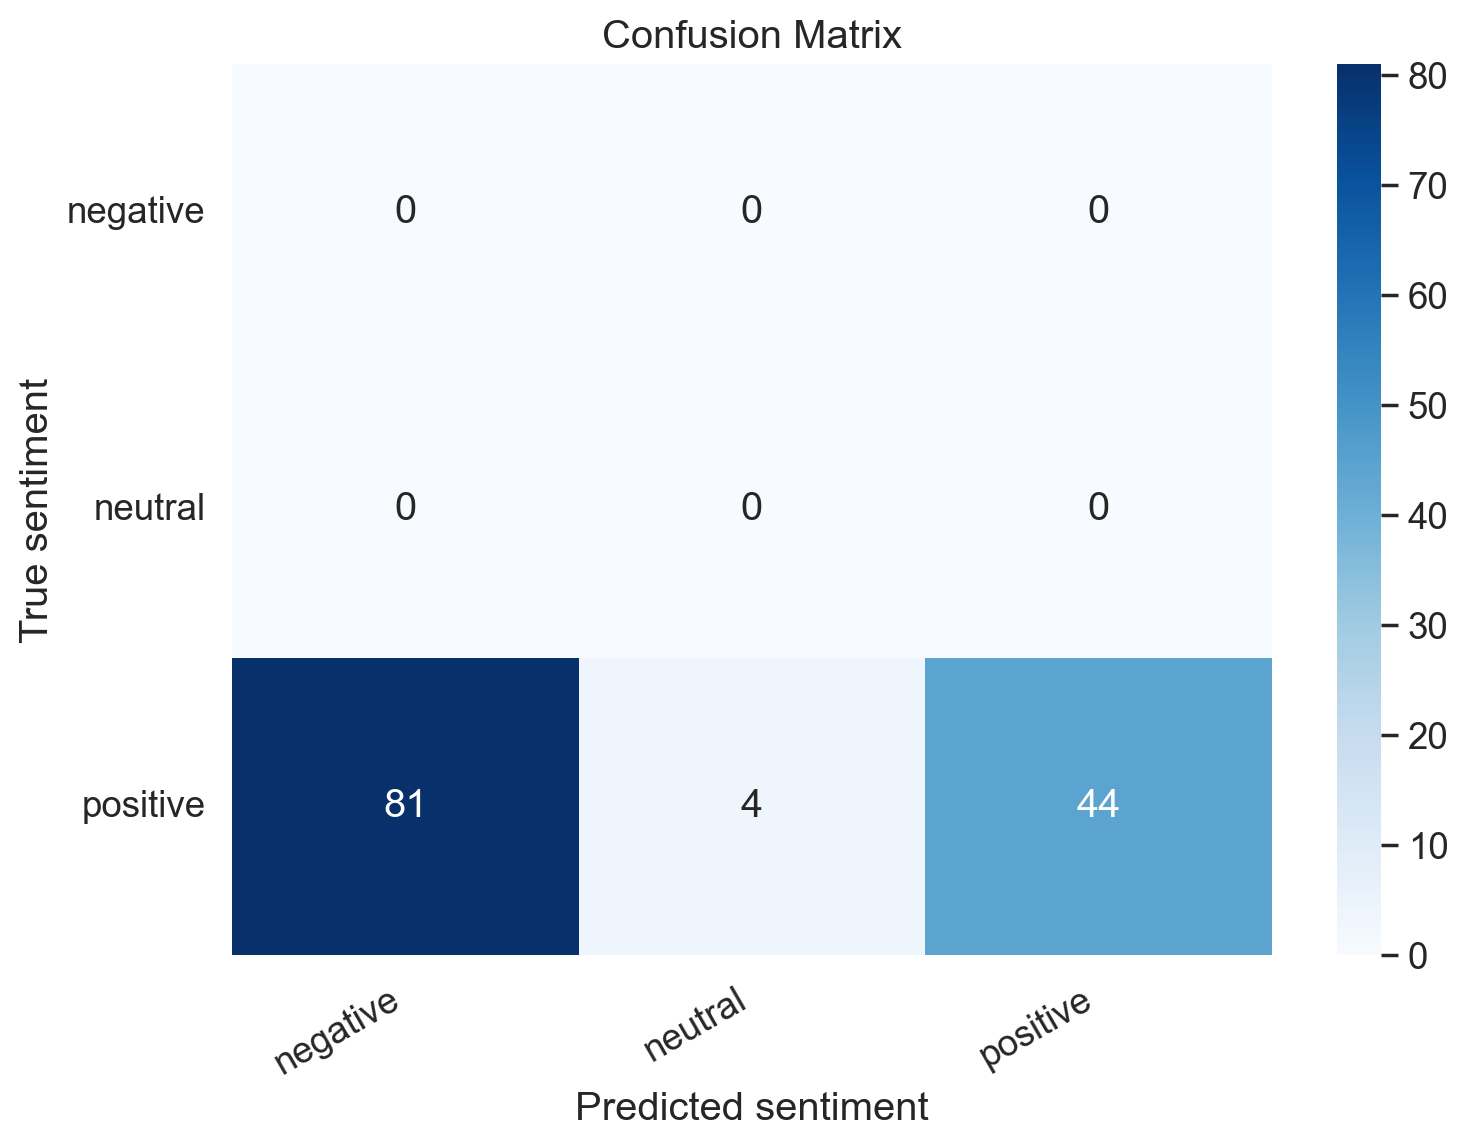

In [22]:
plot_confusion_matrix(y_test_0, final_preds_majority, class_names)
plot_confusion_matrix(y_test_0, final_preds_softmax_avg, class_names)

### True sentiment: negative - Predicted sentiment: positive

In [ ]:
# neg_pos_df_variations_dict = llm_augment(llama_pipeline, neg_pos_df, paraphrasing_prompt)
# save_variations_to_csv(neg_pos_df_variations_dict, neg_pos_df, "neg_pos_df_paraphrasing_variations_prompt", base_path="")

In [23]:
test_neg_pos_df_paraphrasing_variations_prompt_variation_1 = pd.read_csv("../generated/data_augmentation/test_neg_pos_df_paraphrasing_variations_prompt_variation_1.csv", index_col=0)

test_neg_pos_df_paraphrasing_variations_prompt_variation_2 = pd.read_csv("../generated/data_augmentation/test_neg_pos_df_paraphrasing_variations_prompt_variation_2.csv", index_col=0)


test_data_loader_0 = create_data_loader(test_df.iloc[neg_pos], roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_1 = create_data_loader(test_neg_pos_df_paraphrasing_variations_prompt_variation_1, roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_2 = create_data_loader(test_neg_pos_df_paraphrasing_variations_prompt_variation_2, roberta_tokenizer, config.max_len, config.batch_size)

y_review_texts_0, y_pred_0, y_pred_probs_0, y_test_0 = get_predictions(
    roberta_model,
    test_data_loader_0,
    device
)

y_review_texts_1, y_pred_1, y_pred_probs_1, y_test_1 = get_predictions(
    roberta_model,
    test_data_loader_1,
    device
)

y_review_texts_2, y_pred_2, y_pred_probs_2, y_test_2 = get_predictions(
    roberta_model,
    test_data_loader_2,
    device
)

In [24]:
final_preds_majority = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    strategy="majority"
)

final_preds_softmax_avg = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    probs_list=[y_pred_probs_0, y_pred_probs_1, y_pred_probs_2],
    strategy="softmax_avg"
)

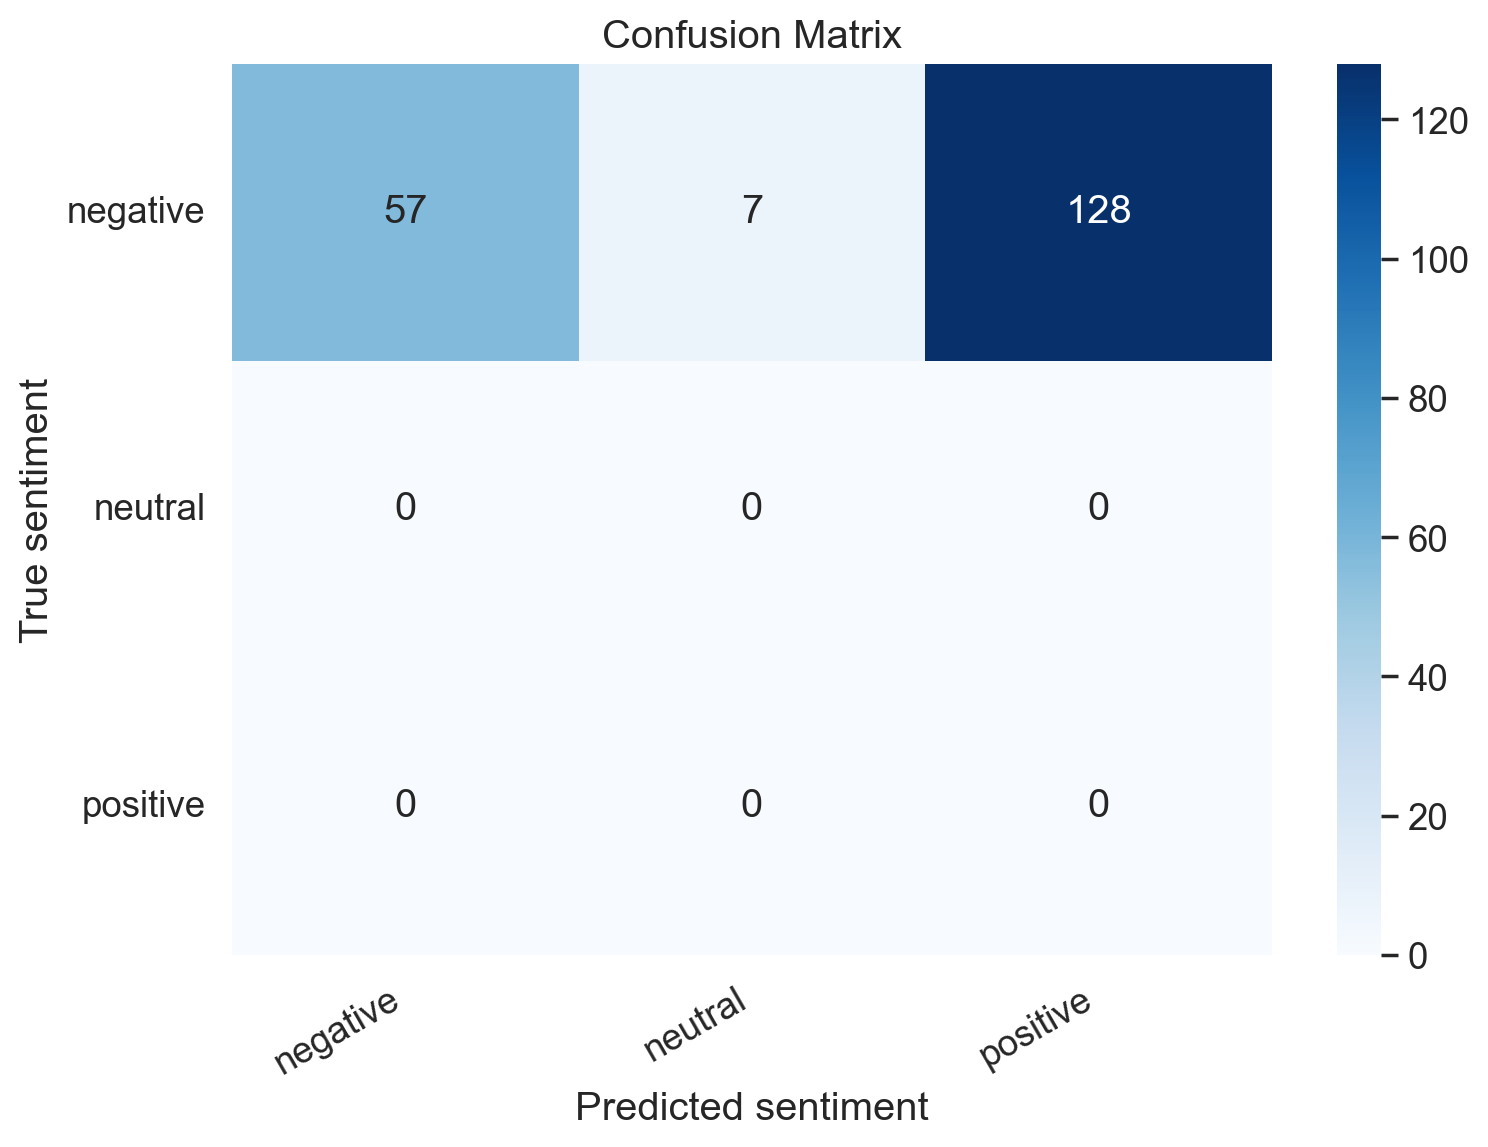

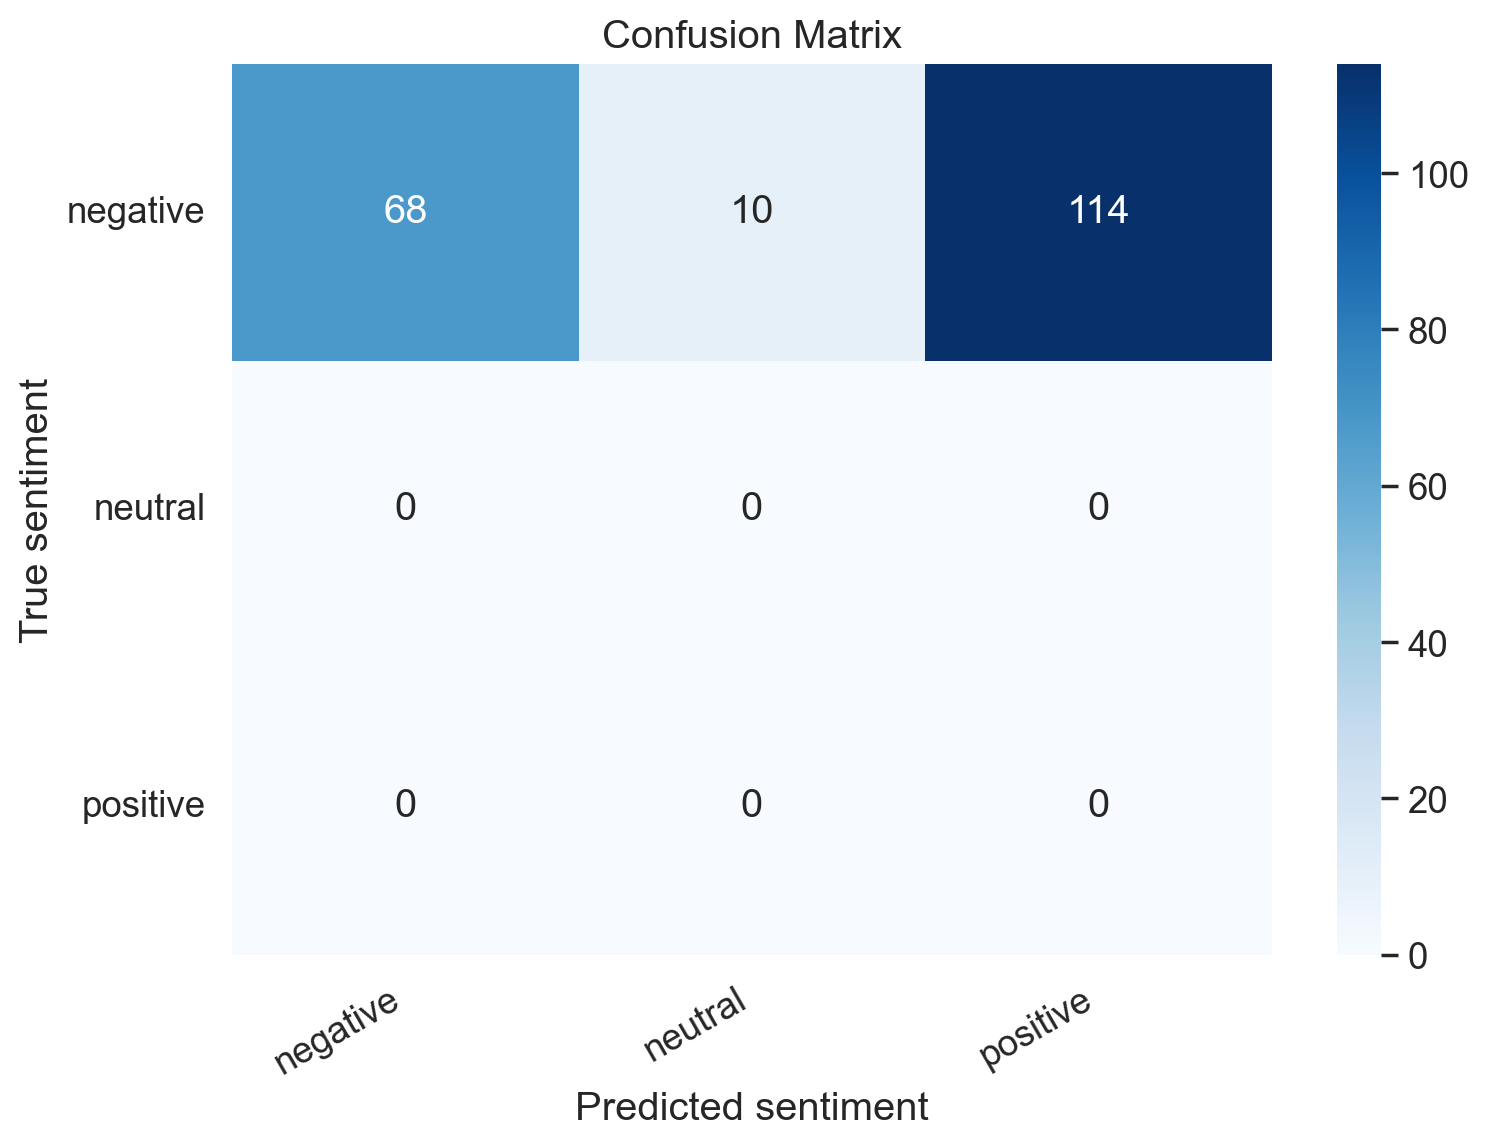

In [25]:
plot_confusion_matrix(y_test_0, final_preds_majority, class_names)
plot_confusion_matrix(y_test_0, final_preds_softmax_avg, class_names)

### True sentiment: neutral - Predicted sentiment: negative

In [ ]:
# neu_neg_df_variations_dict = llm_augment(llama_pipeline, neu_neg_df, paraphrasing_prompt)
# save_variations_to_csv(neu_neg_df_variations_dict, neu_neg_df, "neu_neg_df_paraphrasing_variations_prompt", base_path="")

In [27]:
test_neu_neg_df_paraphrasing_variations_prompt_variation_1 = pd.read_csv("../generated/data_augmentation/test_neu_neg_df_paraphrasing_variations_prompt_variation_1.csv", index_col=0)

test_neu_neg_df_paraphrasing_variations_prompt_variation_2 = pd.read_csv("../generated/data_augmentation/test_neu_neg_df_paraphrasing_variations_prompt_variation_2.csv", index_col=0)


test_data_loader_0 = create_data_loader(test_df.iloc[other_mistakes["neu_neg"]], roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_1 = create_data_loader(test_neu_neg_df_paraphrasing_variations_prompt_variation_1, roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_2 = create_data_loader(test_neu_neg_df_paraphrasing_variations_prompt_variation_2, roberta_tokenizer, config.max_len, config.batch_size)

y_review_texts_0, y_pred_0, y_pred_probs_0, y_test_0 = get_predictions(
    roberta_model,
    test_data_loader_0,
    device
)

y_review_texts_1, y_pred_1, y_pred_probs_1, y_test_1 = get_predictions(
    roberta_model,
    test_data_loader_1,
    device
)

y_review_texts_2, y_pred_2, y_pred_probs_2, y_test_2 = get_predictions(
    roberta_model,
    test_data_loader_2,
    device
)

In [28]:
final_preds_majority = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    strategy="majority"
)

final_preds_softmax_avg = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    probs_list=[y_pred_probs_0, y_pred_probs_1, y_pred_probs_2],
    strategy="softmax_avg"
)

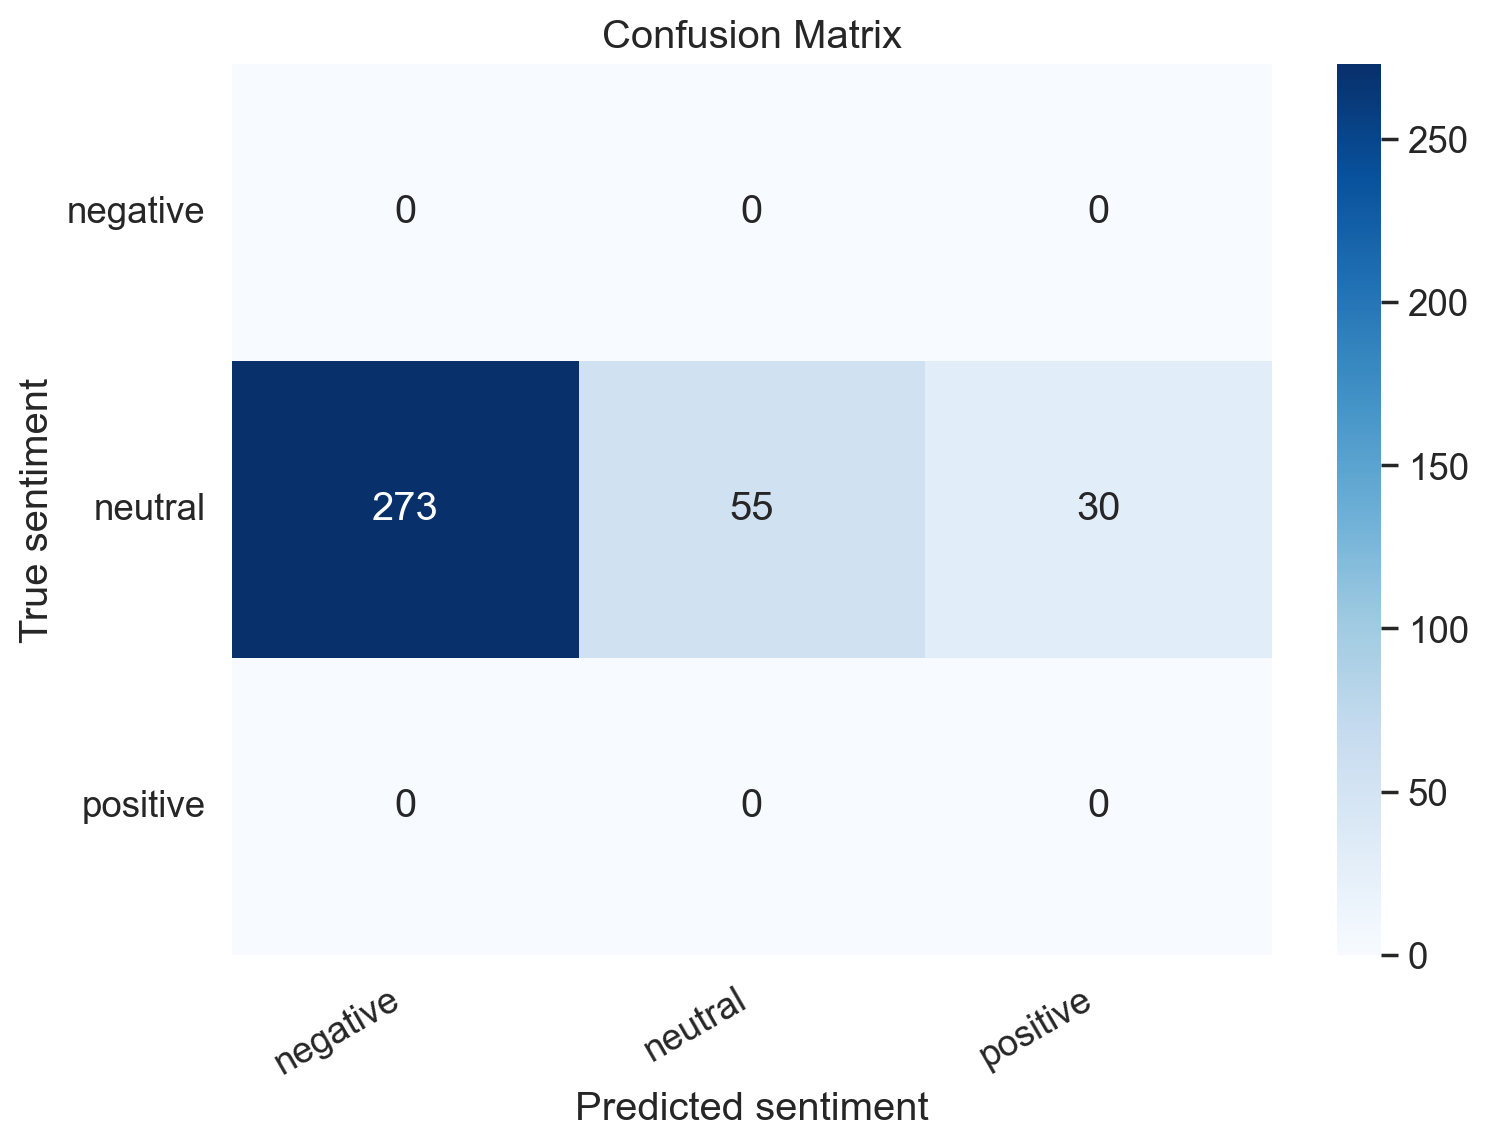

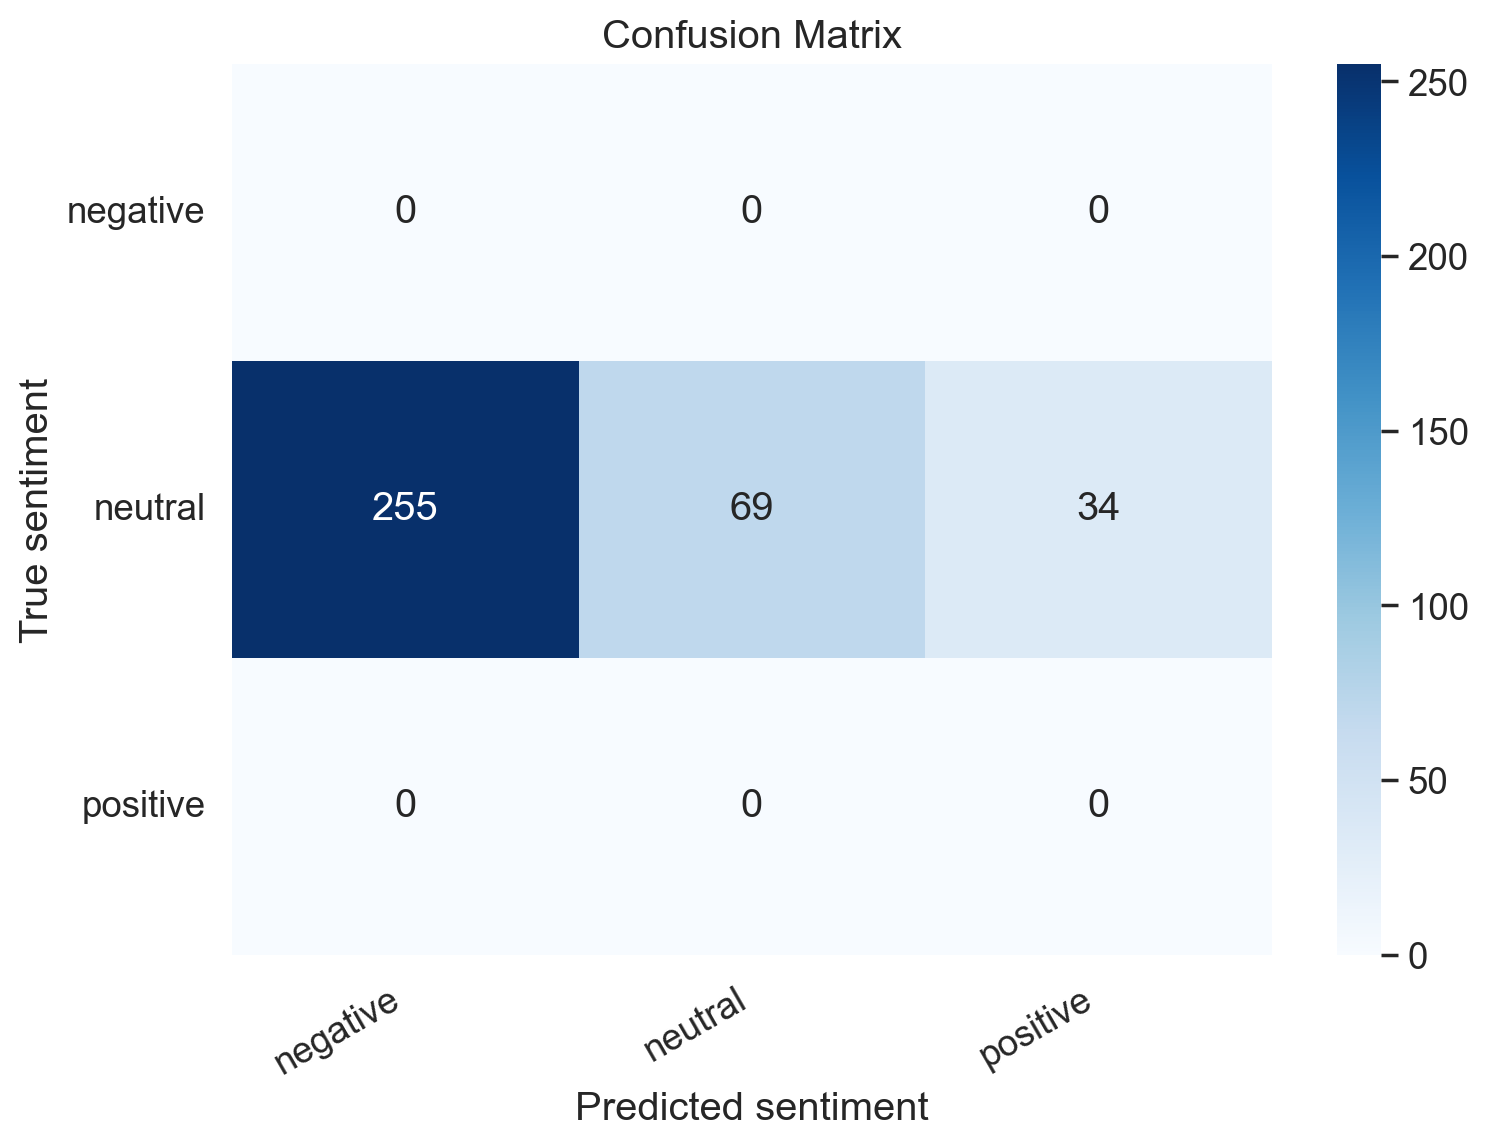

In [29]:
plot_confusion_matrix(y_test_0, final_preds_majority, class_names)
plot_confusion_matrix(y_test_0, final_preds_softmax_avg, class_names)

### True sentiment: neutral - Predicted sentiment: positive

In [ ]:
# neu_pos_df_variations_dict = llm_augment(llama_pipeline, neu_pos_df, paraphrasing_prompt)
# save_variations_to_csv(neu_pos_df_variations_dict, neu_pos_df, "neu_pos_df_paraphrasing_variations_prompt", base_path="")

In [31]:
test_neu_pos_df_paraphrasing_variations_prompt_variation_1 = pd.read_csv("../generated/data_augmentation/test_neu_pos_df_paraphrasing_variations_prompt_variation_1.csv", index_col=0)

test_neu_pos_df_paraphrasing_variations_prompt_variation_2 = pd.read_csv("../generated/data_augmentation/test_neu_pos_df_paraphrasing_variations_prompt_variation_2.csv", index_col=0)


test_data_loader_0 = create_data_loader(test_df.iloc[other_mistakes["neu_pos"]], roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_1 = create_data_loader(test_neu_pos_df_paraphrasing_variations_prompt_variation_1, roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_2 = create_data_loader(test_neu_pos_df_paraphrasing_variations_prompt_variation_2, roberta_tokenizer, config.max_len, config.batch_size)

y_review_texts_0, y_pred_0, y_pred_probs_0, y_test_0 = get_predictions(
    roberta_model,
    test_data_loader_0,
    device
)

y_review_texts_1, y_pred_1, y_pred_probs_1, y_test_1 = get_predictions(
    roberta_model,
    test_data_loader_1,
    device
)

y_review_texts_2, y_pred_2, y_pred_probs_2, y_test_2 = get_predictions(
    roberta_model,
    test_data_loader_2,
    device
)

In [32]:
final_preds_majority = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    strategy="majority"
)

final_preds_softmax_avg = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    probs_list=[y_pred_probs_0, y_pred_probs_1, y_pred_probs_2],
    strategy="softmax_avg"
)

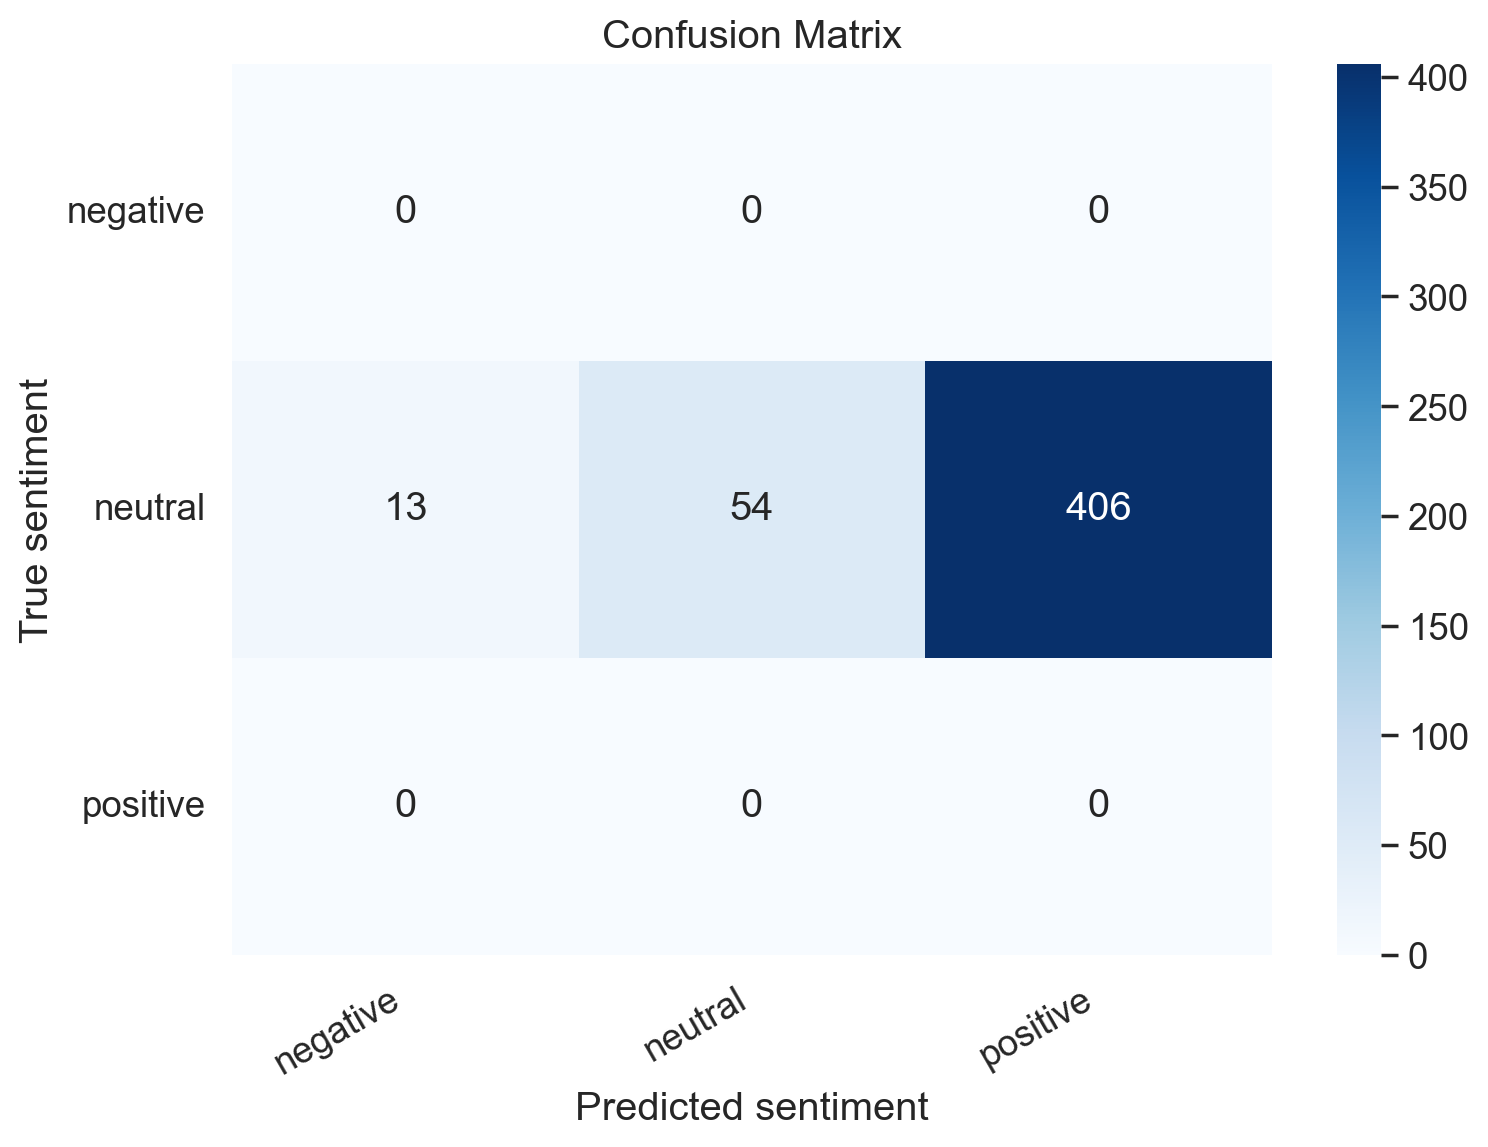

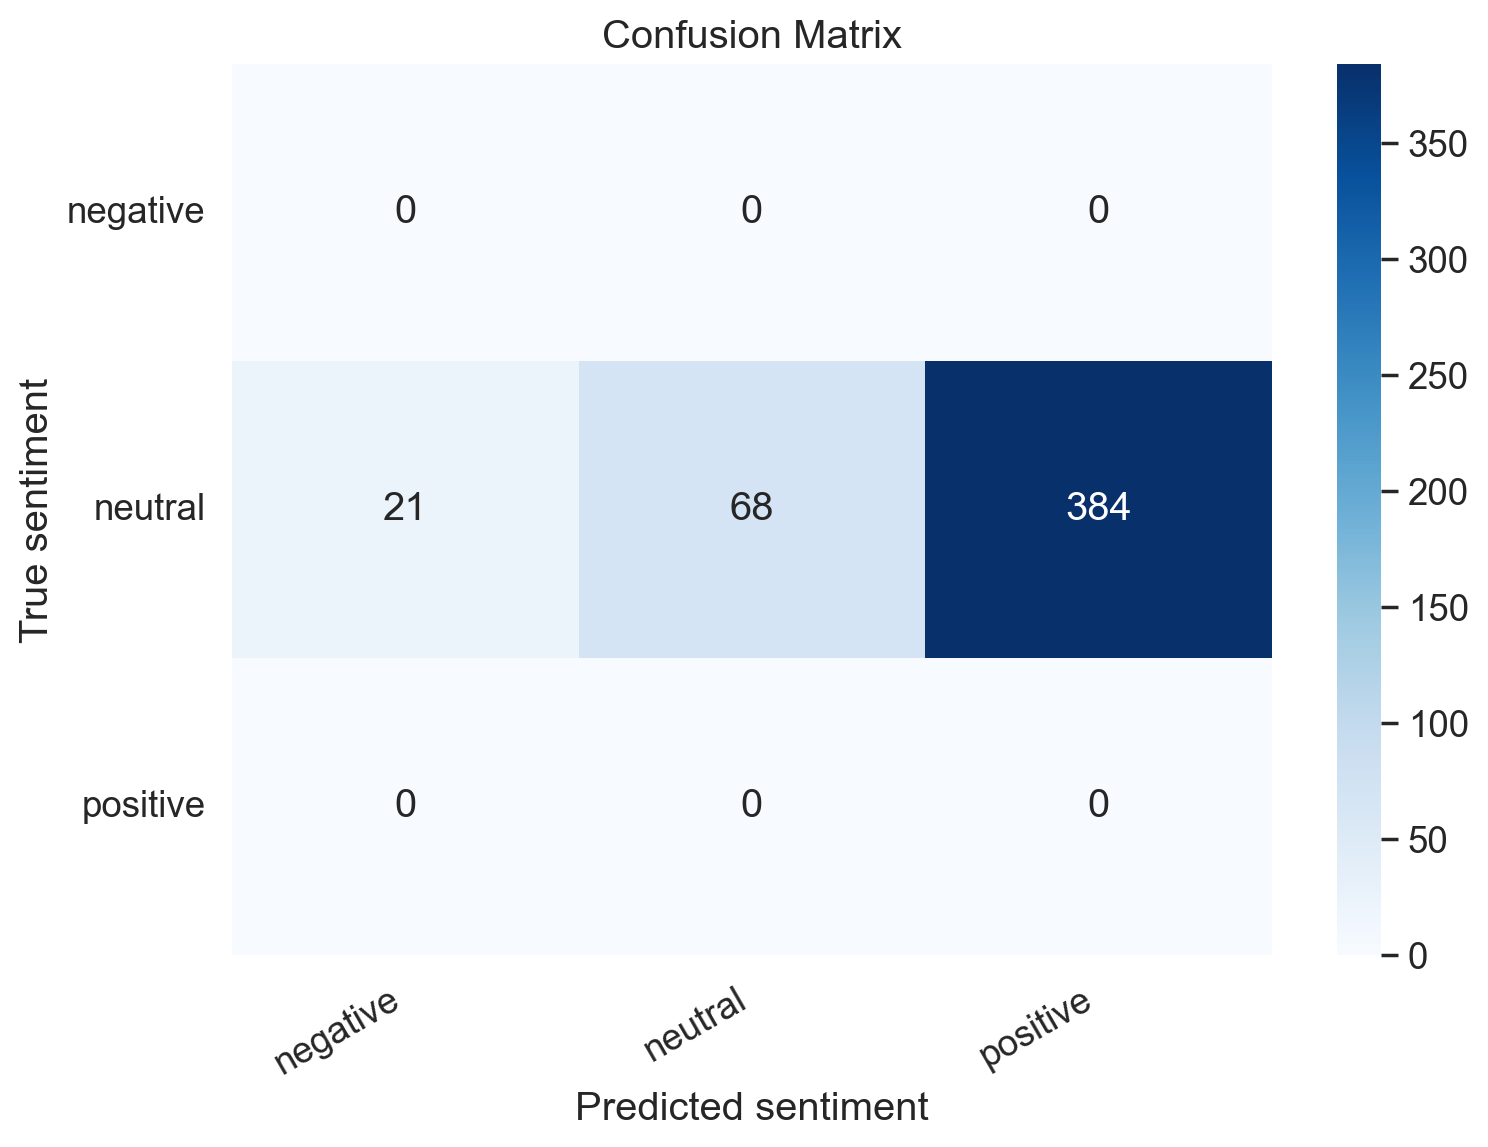

In [33]:
plot_confusion_matrix(y_test_0, final_preds_majority, class_names)
plot_confusion_matrix(y_test_0, final_preds_softmax_avg, class_names)

### True sentiment: positive - Predicted sentiment: neutral

In [34]:
# pos_neu_df_variations_dict = llm_augment(llama_pipeline, pos_neu_df, paraphrasing_prompt)
# save_variations_to_csv(pos_neu_df_variations_dict, pos_neu_df, "pos_neu_df_paraphrasing_variations_prompt", base_path="")

In [36]:
test_pos_neu_df_paraphrasing_variations_prompt_variation_1 = pd.read_csv("../generated/data_augmentation/test_pos_neu_df_paraphrasing_variations_prompt_variation_1.csv", index_col=0)

test_pos_neu_df_paraphrasing_variations_prompt_variation_2 = pd.read_csv("../generated/data_augmentation/test_pos_neu_df_paraphrasing_variations_prompt_variation_2.csv", index_col=0)


test_data_loader_0 = create_data_loader(test_df.iloc[other_mistakes["pos_neu"]], roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_1 = create_data_loader(test_pos_neu_df_paraphrasing_variations_prompt_variation_1, roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_2 = create_data_loader(test_pos_neu_df_paraphrasing_variations_prompt_variation_2, roberta_tokenizer, config.max_len, config.batch_size)

y_review_texts_0, y_pred_0, y_pred_probs_0, y_test_0 = get_predictions(
    roberta_model,
    test_data_loader_0,
    device
)

y_review_texts_1, y_pred_1, y_pred_probs_1, y_test_1 = get_predictions(
    roberta_model,
    test_data_loader_1,
    device
)

y_review_texts_2, y_pred_2, y_pred_probs_2, y_test_2 = get_predictions(
    roberta_model,
    test_data_loader_2,
    device
)

In [37]:
final_preds_majority = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    strategy="majority"
)

final_preds_softmax_avg = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    probs_list=[y_pred_probs_0, y_pred_probs_1, y_pred_probs_2],
    strategy="softmax_avg"
)

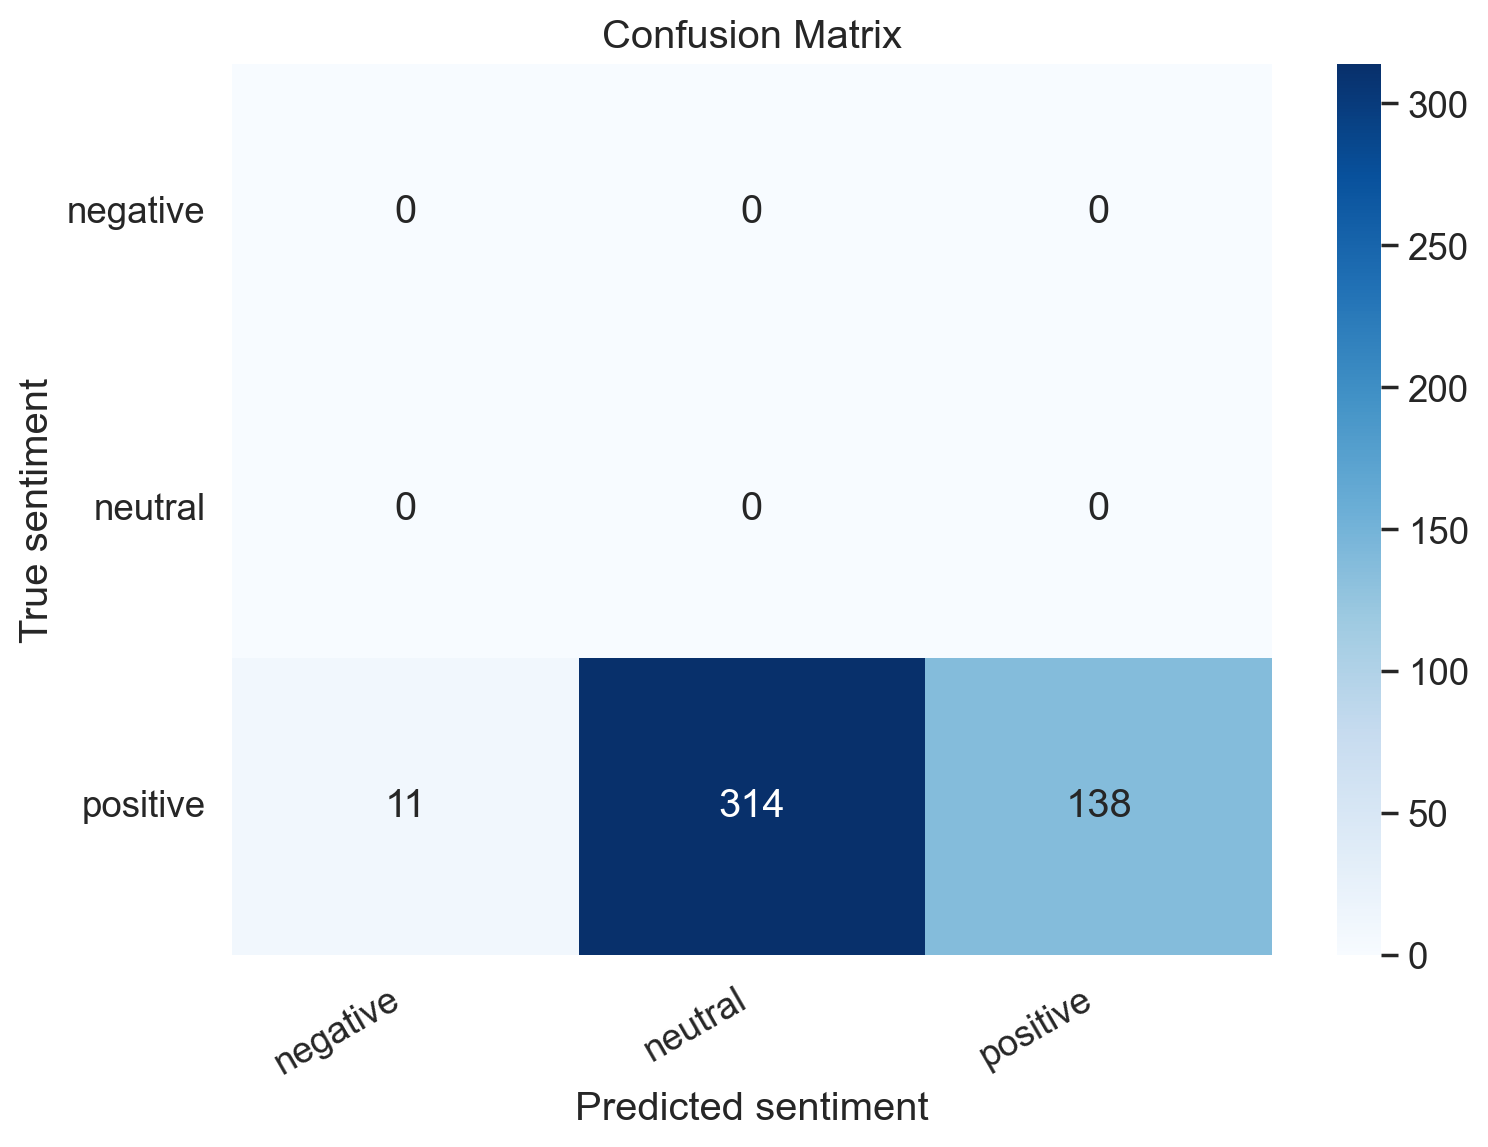

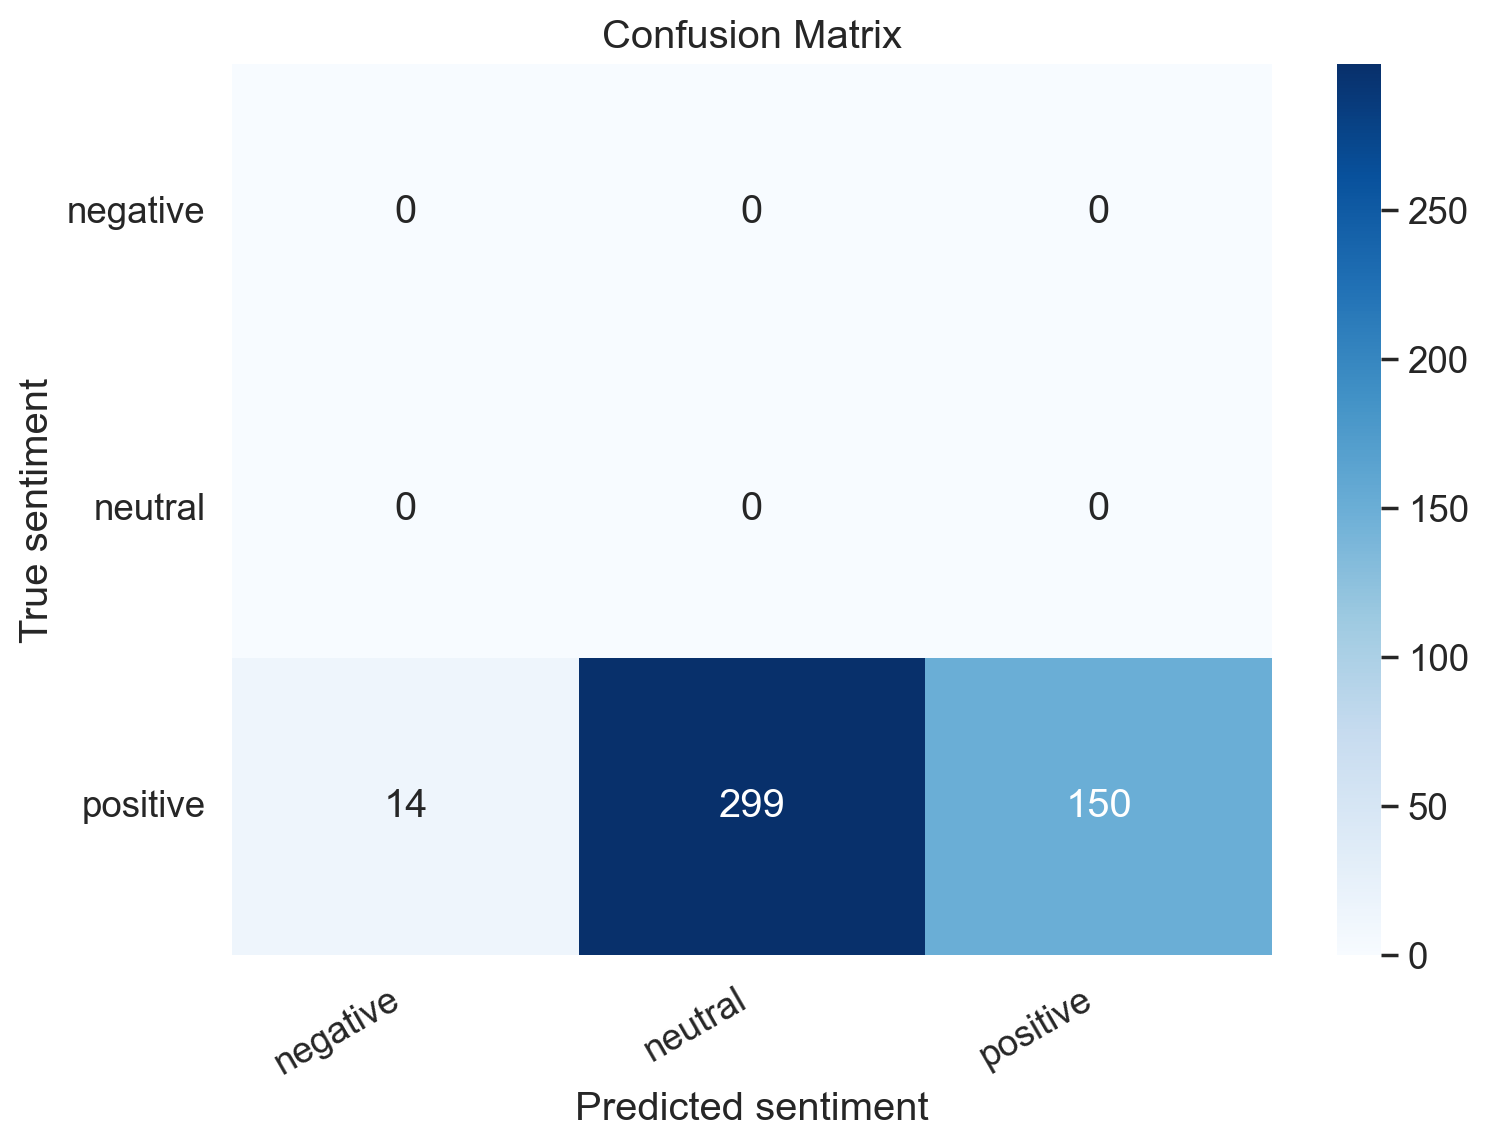

In [38]:
plot_confusion_matrix(y_test_0, final_preds_majority, class_names)
plot_confusion_matrix(y_test_0, final_preds_softmax_avg, class_names)

### True sentiment: negative - Predicted sentiment: neutral

In [ ]:
# neg_neu_df_variations_dict = llm_augment(llama_pipeline, neg_neu_df, paraphrasing_prompt)
# save_variations_to_csv(neg_neu_df_variations_dict, neg_neu_df, "neg_neu_df_paraphrasing_variations_prompt", base_path="")

In [39]:
test_neg_neu_df_paraphrasing_variations_prompt_variation_1 = pd.read_csv("../generated/data_augmentation/test_neg_neu_df_paraphrasing_variations_prompt_variation_1.csv", index_col=0)

test_neg_neu_df_paraphrasing_variations_prompt_variation_2 = pd.read_csv("../generated/data_augmentation/test_neg_neu_df_paraphrasing_variations_prompt_variation_2.csv", index_col=0)


test_data_loader_0 = create_data_loader(test_df.iloc[other_mistakes["neg_neu"]], roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_1 = create_data_loader(test_neg_neu_df_paraphrasing_variations_prompt_variation_1, roberta_tokenizer, config.max_len, config.batch_size)

test_data_loader_2 = create_data_loader(test_neg_neu_df_paraphrasing_variations_prompt_variation_2, roberta_tokenizer, config.max_len, config.batch_size)

y_review_texts_0, y_pred_0, y_pred_probs_0, y_test_0 = get_predictions(
    roberta_model,
    test_data_loader_0,
    device
)

y_review_texts_1, y_pred_1, y_pred_probs_1, y_test_1 = get_predictions(
    roberta_model,
    test_data_loader_1,
    device
)

y_review_texts_2, y_pred_2, y_pred_probs_2, y_test_2 = get_predictions(
    roberta_model,
    test_data_loader_2,
    device
)

In [40]:
final_preds_majority = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    strategy="majority"
)

final_preds_softmax_avg = predict_with_ensemble(
    preds_list=[y_pred_0, y_pred_1, y_pred_2],
    probs_list=[y_pred_probs_0, y_pred_probs_1, y_pred_probs_2],
    strategy="softmax_avg"
)

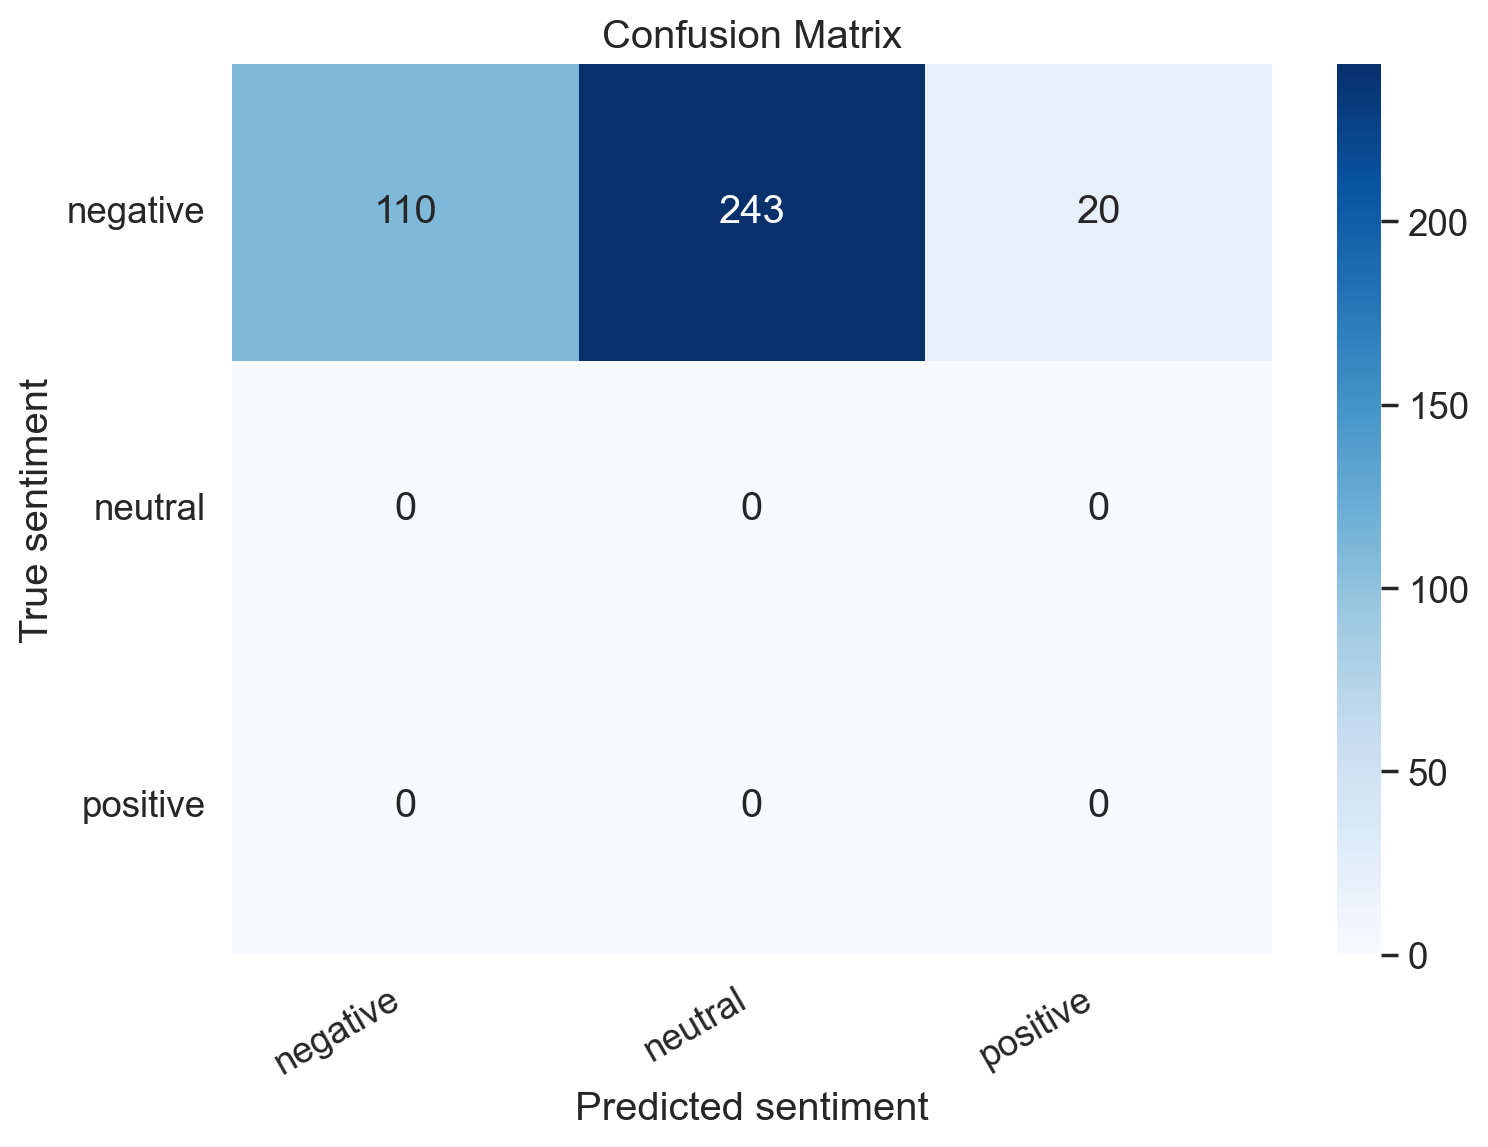

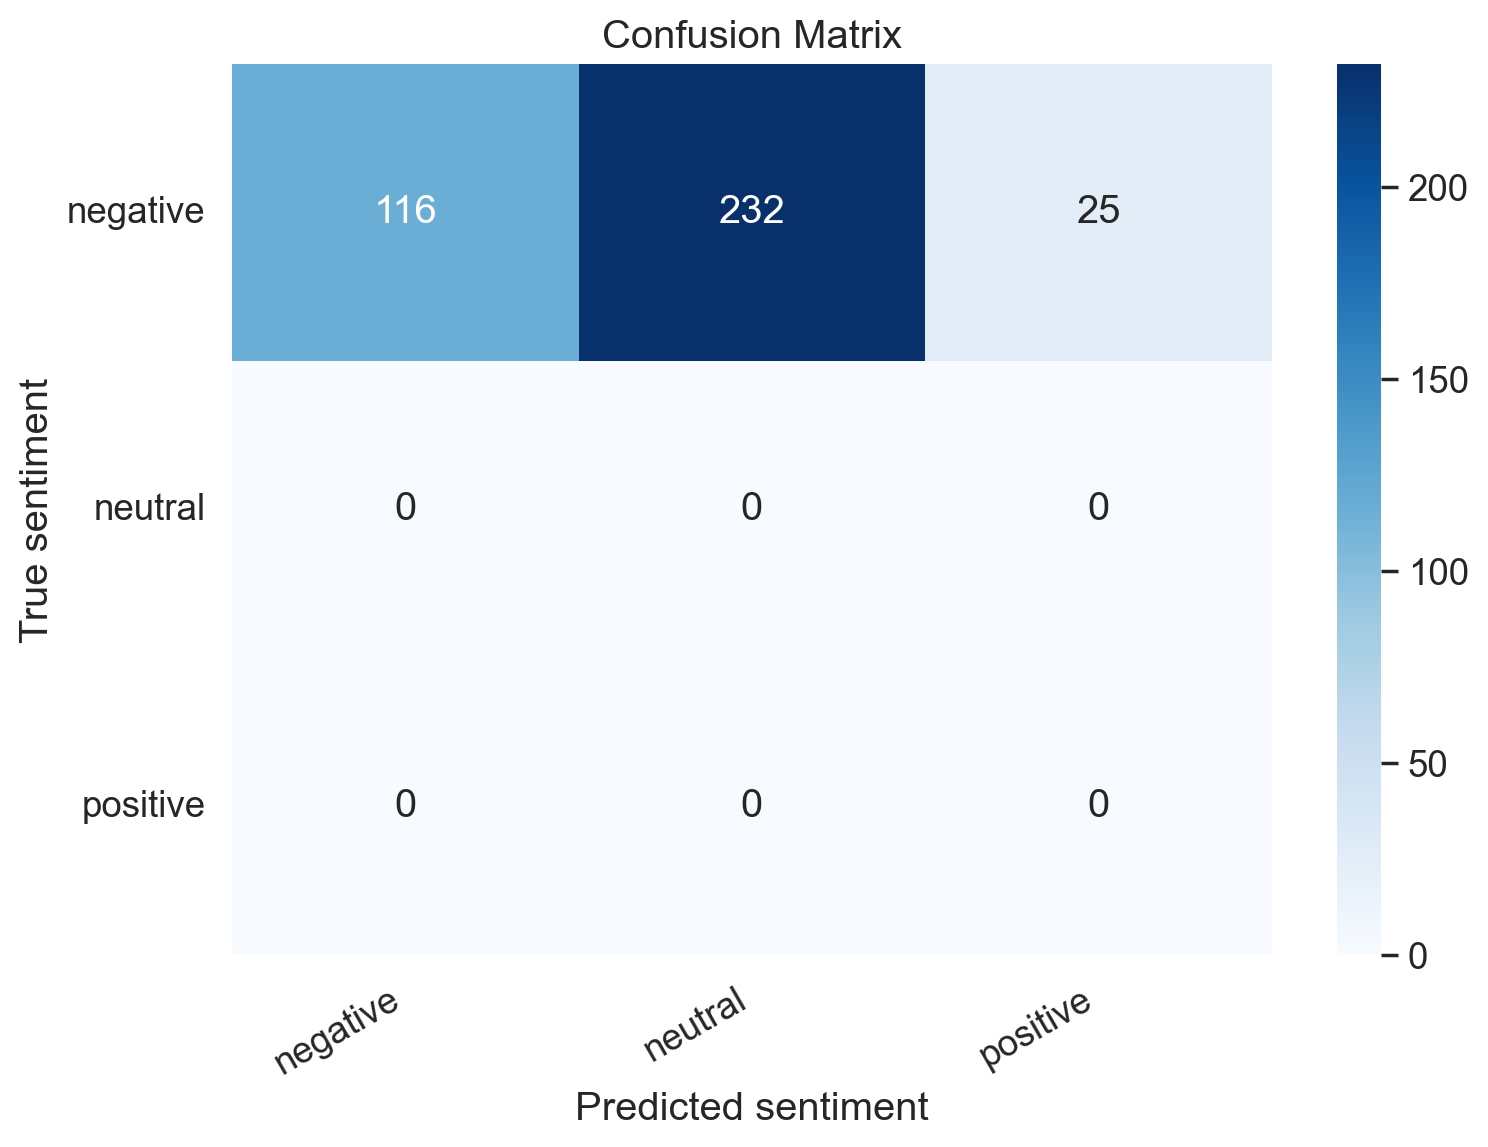

In [41]:
plot_confusion_matrix(y_test_0, final_preds_majority, class_names)
plot_confusion_matrix(y_test_0, final_preds_softmax_avg, class_names)

### Discussion

We can see that on the samples that were wronly classified. Softmax averaging performs well, out of

129 + 192 + 358 + 473 + 463 + 373 = 1988



legacy


-------

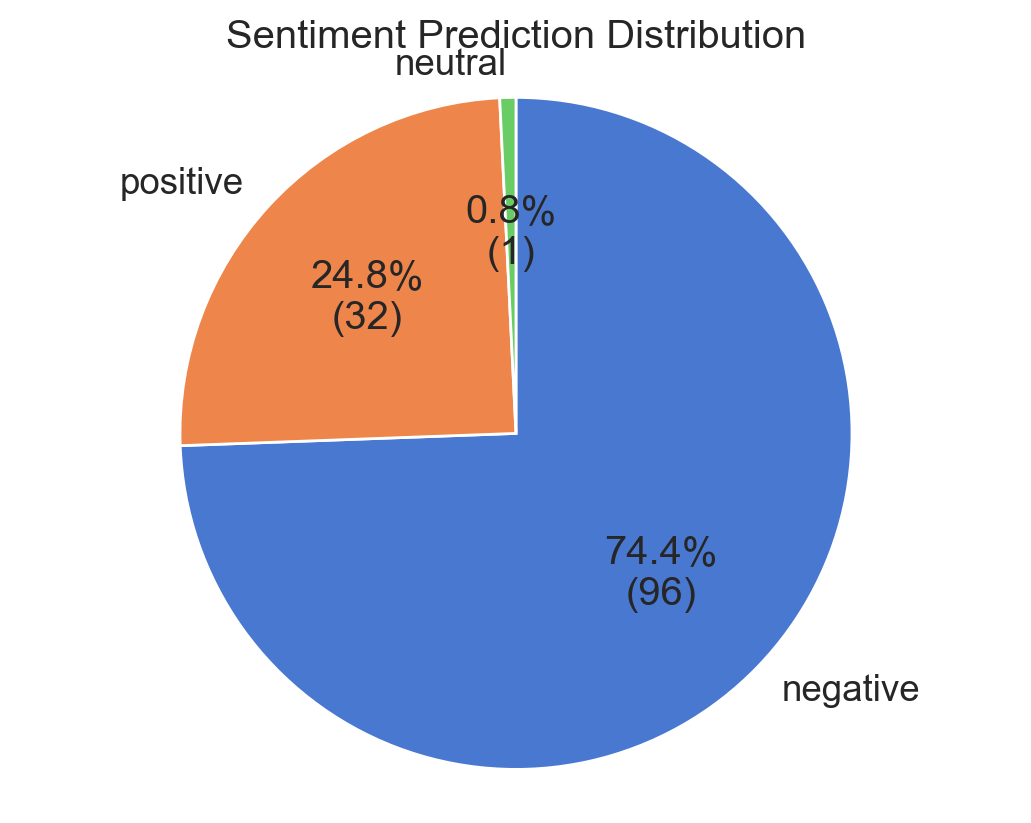

In [28]:
import matplotlib.pyplot as plt
from collections import Counter
from config.config import LABEL_MAPPING_NUMBER_TO_STRING

# Count occurrences
counts = Counter(final_preds)

# Map numeric labels to string labels
labels = [LABEL_MAPPING_NUMBER_TO_STRING[label] for label in counts.keys()]
sizes = list(counts.values())

# Custom label formatter to show both count and percentage
def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return inner_autopct

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes,
       labels=labels,
       autopct=autopct_format(sizes),
       startangle=90,
       counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.title("Sentiment Prediction Distribution")
plt.show()